In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('data\exams.csv')

In [9]:
!pip install catboost

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   - -------------------------------------- 4.2/102.5 MB 22.9 MB/s eta 0:00:05
   ---- ----------------------------------- 10.5/102.5 MB 25.1 MB/s eta 0:00:04
   ------ --------------------------------- 16.8/102.5 MB 26.4 MB/s eta 0:00:04
   -------- ------------------------------- 22.0/102.5 MB 26.3 MB/s eta 0:00:04
   --------- ------------------------------ 25.2/102.5 MB 25.3 MB/s eta 0:00:04
   ----------- ---------------------------- 29.9/102.5 MB 23.4 MB/s eta 0:00:04
   ------------ --------------------------- 32.5/102.5 MB 22.2 MB/s eta 0:00:04
   --------------- ------------------------ 38.8/102.5 MB 23.0 MB/s eta 0:00:03
   ----------------- ---------------------- 44.0/102.5 MB 23.0 MB/s eta 0:00:03
   ------------------- -------------------- 49.3/102.5 MB 23.4 MB/s eta 0:00:03
   -------------------- ------------------- 53.5/102.5 MB 23.2 MB/s

In [11]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ----- ---------------------------------- 10.0/72.0 MB 51.9 MB/s eta 0:00:02
   ----------- ---------------------------- 19.9/72.0 MB 50.4 MB/s eta 0:00:02
   ---------------- ----------------------- 29.9/72.0 MB 49.9 MB/s eta 0:00:01
   ----------------------- ---------------- 41.9/72.0 MB 50.3 MB/s eta 0:00:01
   --------------------------------- ------ 59.8/72.0 MB 57.7 MB/s eta 0:00:01
   -------------------------------------- - 69.2/72.0 MB 57.3 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 49.4 MB/s  0:00:01


In [14]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
X=df.drop('writing score',axis=1)
y=df['writing score']

In [19]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,male,group A,high school,standard,completed,67,67
1,female,group D,some high school,free/reduced,none,40,59
2,male,group E,some college,free/reduced,none,59,60
3,male,group B,high school,standard,none,77,78
4,male,group E,associate's degree,standard,completed,78,73
...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70
996,male,group D,associate's degree,free/reduced,completed,85,91
997,female,group C,some high school,free/reduced,none,32,35
998,female,group C,some college,standard,none,73,74


In [20]:
y

0      63
1      55
2      50
3      68
4      68
       ..
995    65
996    92
997    41
998    82
999    62
Name: writing score, Length: 1000, dtype: int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
num_columns = X.select_dtypes(exclude=['object']).columns
cat_columns = X.select_dtypes(include=['object']).columns   

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_features = StandardScaler()
categorical_features = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler",numerical_features, num_columns),
        ('OneHotEncoder', categorical_features, cat_columns)
    ])
preprocessor.fit(X)
X_processed = preprocessor.transform(X)
X_processed.shape


(1000, 19)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)  
print("y_test shape:", y_test.shape)

x_train shape: (800, 19)
x_test shape: (200, 19)
y_train shape: (800,)
y_test shape: (200,)


In [31]:
def evaluate_model(true, y_pred):
    mae = mean_absolute_error(true, y_pred)
    mse = mean_squared_error(true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, y_pred)
    return mae, mse, rmse, r2


In [32]:
models = {
    "Linear Regression": LinearRegression(),    
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),    
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2 Score", ascending=False)
results_df


,MAE,MSE,RMSE,R2 Score
Linear Regression,2.799468,12.009471,3.465468,0.954591
Random Forest,3.345383,17.687606,4.205664,0.933122
Support Vector Machine,3.729611,24.783913,4.978344,0.906290
CatBoost,2.814489,12.683381,3.561373,0.952043
XGBoost,3.416751,17.959902,4.237912,0.932092


In [33]:
#LInear regression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
mae_linear, mse_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
mae_linear, mse_linear, rmse_linear, r2_linear


(2.799468401918197,
 12.00947073355145,
 np.float64(3.4654683281702994),
 0.9545912775545156)

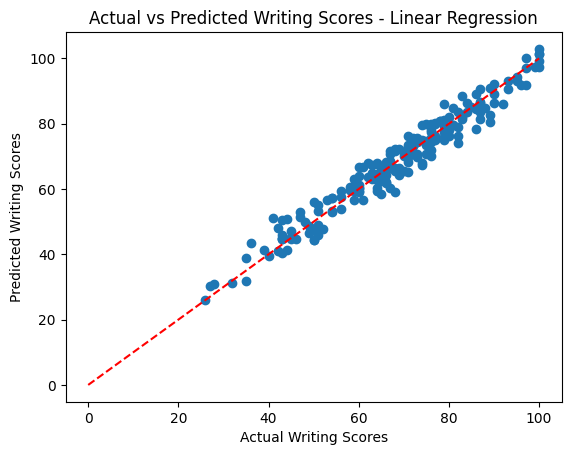

In [34]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Writing Scores")
plt.ylabel("Predicted Writing Scores")
plt.title("Actual vs Predicted Writing Scores - Linear Regression") 
plt.plot([0, 100], [0, 100], 'r--')  # Diagonal line
plt.show()

In [37]:
predict_df = pd.DataFrame({
    "Actual Writing Scores": y_test,
    "Predicted Writing Scores": y_pred_linear,"difference": y_test - y_pred_linear
})

In [38]:
predict_df

,Actual Writing Scores,Predicted Writing Scores,difference
521,82,83.547714,-1.547714
737,81,79.667518,1.332482
740,51,48.955061,2.044939
660,97,91.784093,5.215907
411,72,73.075445,-1.075445
...,...,...,...
408,43,44.775021,-1.775021
332,43,50.466389,-7.466389
208,84,83.475643,0.524357
613,82,76.304131,5.695869
